In [12]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import math
import numpy as np

In [13]:
(X_Train,_),(_,_) = mnist.load_data()  

In [14]:
print(X_Train.shape)
print(type(X_Train))

X_Train = X_Train.reshape((*(X_Train.shape),1))
print(X_Train.shape)

(60000, 28, 28)
<class 'numpy.ndarray'>
(60000, 28, 28, 1)


In [15]:
#Normalize the Data between -1 and 1

X_Train = (X_Train.astype('float32') - 127.5)/127.5

print(np.min(X_Train))
print(np.max(X_Train))

-1.0
1.0


In [16]:
NUM_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = math.ceil(X_Train.shape[0]/float(BATCH_SIZE))
HALF_BATCH_SIZE = int(BATCH_SIZE/2)

NOISE_DIM = 100

adam = Adam(lr=2e-4,beta_1=0.5)

In [17]:
# Generator
generator= Sequential()

In [18]:
generator.add(Dense(7*7*128, input_shape=(NOISE_DIM,))) #Upsampling noise
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

#Double activation size 14 x 14 x 64


generator.add(Conv2DTranspose(64,kernel_size=(5,5),strides=(2,2),padding = 'same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())


#Double activation size 28 x 28 x 1
# 2x the sample size eg. 7x7 ko 14x14 bana deta hai
generator.add(Conv2DTranspose(1,kernel_size=(5,5),strides=(2,2),padding = 'same'))


generator.compile(loss='binary_crossentropy',optimizer='adam')

generator.summary()


# Descriminator

discriminator= Sequential()
discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))

#Next Conv Layer (14 x 14 x 64) -----> (7x7x128)
discriminator.add(Conv2D(128,(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))

#Flatten
discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')

discriminator.summary()




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 64)       

In [19]:
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

#Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

def save_imgs(epoch,samples=100):
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

In [20]:
!mkdir images

In [21]:
X_Train.shape

(60000, 28, 28, 1)

C:\Users\manavgakhar\anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\manavgakhar\anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 D loss: 42.158347 G loss: 15.432934
Epoch 2 D loss: 131.896729 G loss: 1100.757681
Epoch 3 D loss: 91.988385 G loss: 633.096034
Epoch 4 D loss: 74.617250 G loss: 744.552608
Epoch 5 D loss: 67.413785 G loss: 779.543081
Epoch 6 D loss: 64.721346 G loss: 817.498326
Epoch 7 D loss: 73.267179 G loss: 817.311671
Epoch 8 D loss: 81.113789 G loss: 764.331368
Epoch 9 D loss: 62.250424 G loss: 796.181058
Epoch 10 D loss: 76.030762 G loss: 858.439931


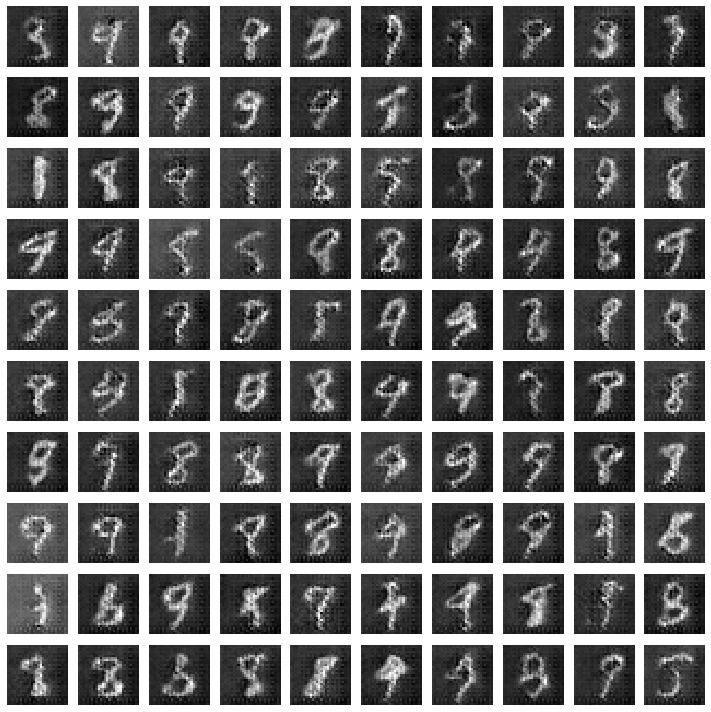

Epoch 11 D loss: 163.409602 G loss: 710.769064
Epoch 12 D loss: 70.930293 G loss: 686.881946
Epoch 13 D loss: 64.444985 G loss: 739.017369
Epoch 14 D loss: 68.354931 G loss: 752.878364
Epoch 15 D loss: 67.234360 G loss: 773.130743
Epoch 16 D loss: 68.407749 G loss: 790.045673
Epoch 17 D loss: 72.256681 G loss: 776.856221
Epoch 18 D loss: 68.286258 G loss: 774.952890
Epoch 19 D loss: 80.719599 G loss: 811.892075
Epoch 20 D loss: 71.508994 G loss: 740.496210


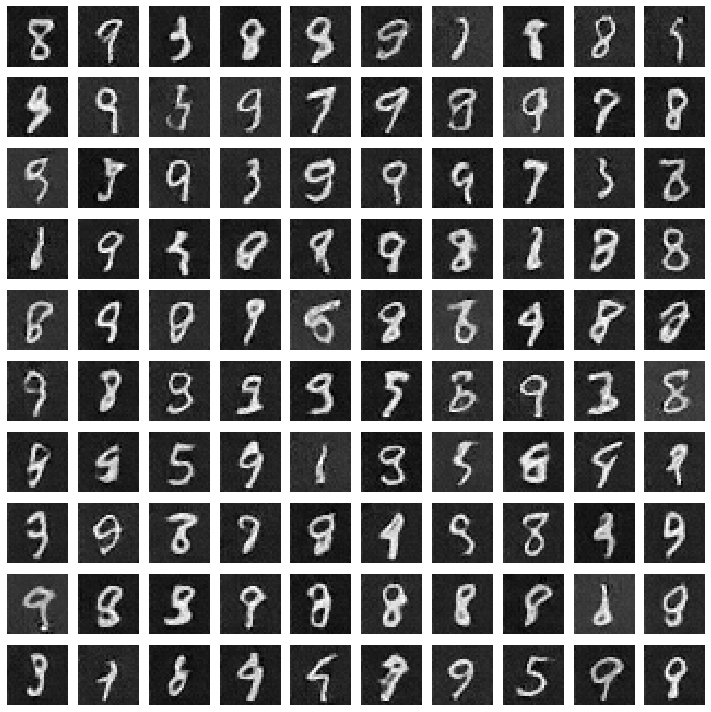

Epoch 21 D loss: 70.382750 G loss: 771.807147
Epoch 22 D loss: 73.447585 G loss: 779.194562
Epoch 23 D loss: 71.539531 G loss: 772.174089
Epoch 24 D loss: 74.823874 G loss: 775.294588
Epoch 25 D loss: 75.822900 G loss: 767.882204
Epoch 26 D loss: 75.205485 G loss: 760.955513
Epoch 27 D loss: 77.872871 G loss: 764.061742
Epoch 28 D loss: 78.269756 G loss: 748.464615
Epoch 29 D loss: 76.439475 G loss: 753.622707
Epoch 30 D loss: 75.554305 G loss: 748.969274


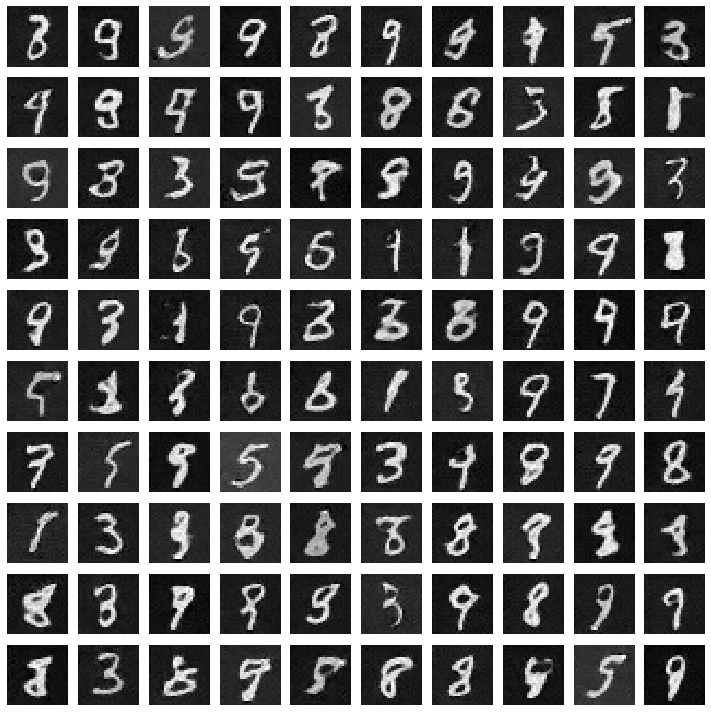

Epoch 31 D loss: 77.296397 G loss: 757.618194
Epoch 32 D loss: 78.667023 G loss: 744.786605
Epoch 33 D loss: 79.009756 G loss: 740.825628
Epoch 34 D loss: 75.518955 G loss: 752.067309
Epoch 35 D loss: 79.378682 G loss: 744.411293
Epoch 36 D loss: 77.203719 G loss: 754.139036
Epoch 37 D loss: 80.324843 G loss: 744.315201
Epoch 38 D loss: 77.633737 G loss: 739.832383
Epoch 39 D loss: 74.541513 G loss: 760.492848
Epoch 40 D loss: 77.890516 G loss: 767.498941


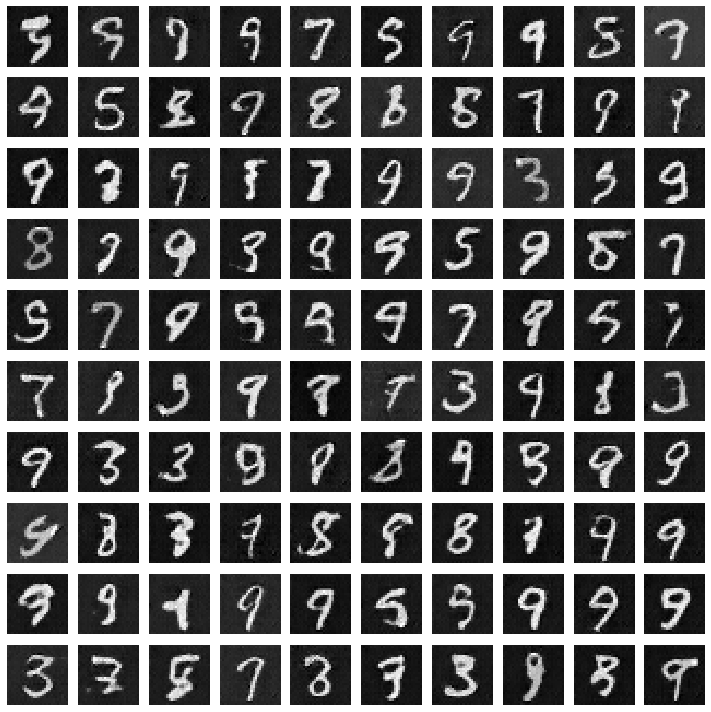

Epoch 41 D loss: 81.457617 G loss: 744.750187
Epoch 42 D loss: 77.495989 G loss: 737.613158
Epoch 43 D loss: 78.592741 G loss: 742.729390
Epoch 44 D loss: 82.225413 G loss: 738.145314
Epoch 45 D loss: 77.022705 G loss: 744.917791
Epoch 46 D loss: 81.414104 G loss: 735.694905
Epoch 47 D loss: 77.610298 G loss: 753.257256
Epoch 48 D loss: 79.431456 G loss: 750.855800
Epoch 49 D loss: 77.228848 G loss: 749.317930
Epoch 50 D loss: 80.049880 G loss: 751.247579


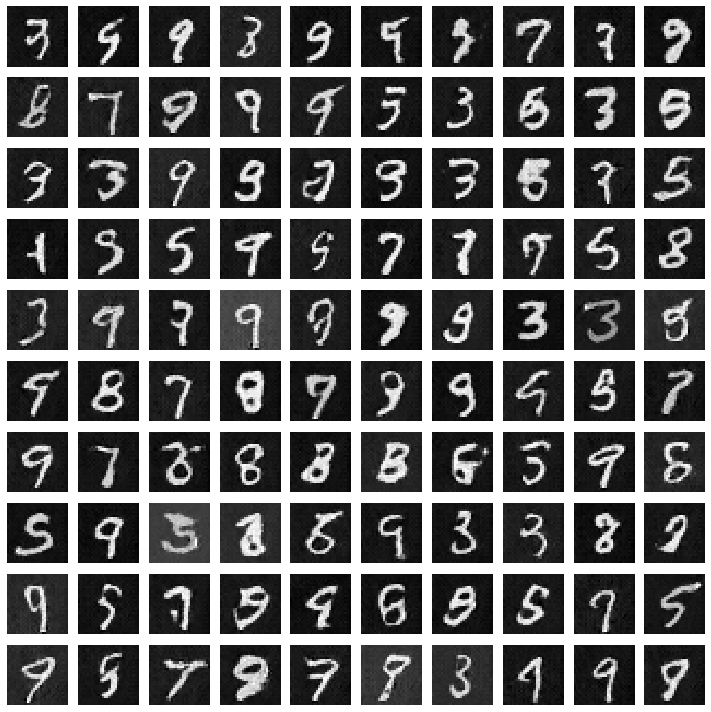

In [22]:
for epoch in range(NUM_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    for step in range(NO_OF_BATCHES):
        #randomly select 50% real images
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE)
        real_imgs = X_Train[idx]
        
        # generate 50% random images
        noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
        fake_imgs = generator.predict(noise)
        
        
        # one sided label smoothing
        real_y = np.ones((HALF_BATCH_SIZE,1))*0.9 #Label Smoothing, Works well in practice
        fake_y = np.zeros((HALF_BATCH_SIZE,1))
        
        # train on real and fake images
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y) #updates the weights of discriminator
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y) 
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        
        #Train Generator (Complete Model Generator + Frozen Discriminator)
        
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        real_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,real_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d D loss: %f G loss: %f" % ((epoch + 1), epoch_d_loss, epoch_g_loss))

    if (epoch+1)%10==0:
        generator.save('models/gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)
       